##Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot
from datetime import datetime
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import shapiro

#Initial Analisis

In [2]:
# Load the dataset
df = pd.read_csv("Sunspots.csv")
df.drop(columns = 'Unnamed: 0',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3265 non-null   object 
 1   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.1+ KB


#For better time series manipulation, let's convert the ‘Date’ column to datetime format and change its order

In [3]:
# Convert 'Date' column to datetime and extract year, month, and day
df['Date'] = pd.to_datetime(df['Date'])
year = df['Date'].dt.year
month = df['Date'].dt.month
day=df['Date'].dt.day


print(df.columns)


Index(['Date', 'Monthly Mean Total Sunspot Number'], dtype='object')


#Set the 'Date' column as the index of the DataFrame

In [4]:
# Set 'Date' as the index
df = df.set_index("Date")
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3265 entries, 1749-01-31 to 2021-01-31
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1)
memory usage: 51.0 KB


#Summary statistics

In [5]:
# Display basic statistics of the dataset
df.describe()

,Monthly Mean Total Sunspot Number
count,3265.000000
mean,81.778775
std,67.889277
min,0.000000
25%,23.900000
50%,67.200000
75%,122.500000
max,398.200000


#Time indices are already sorted from past to present in an ascending order, and none of the values in the 'Monthly Mean Total Sunspot Number' column are null

In [6]:
print(df.index.is_monotonic_increasing)
df.isnull().sum()

True


Monthly Mean Total Sunspot Number    0
dtype: int64

#shows how many months have an average of zero sunspots

Number of zero sunspot values: 67


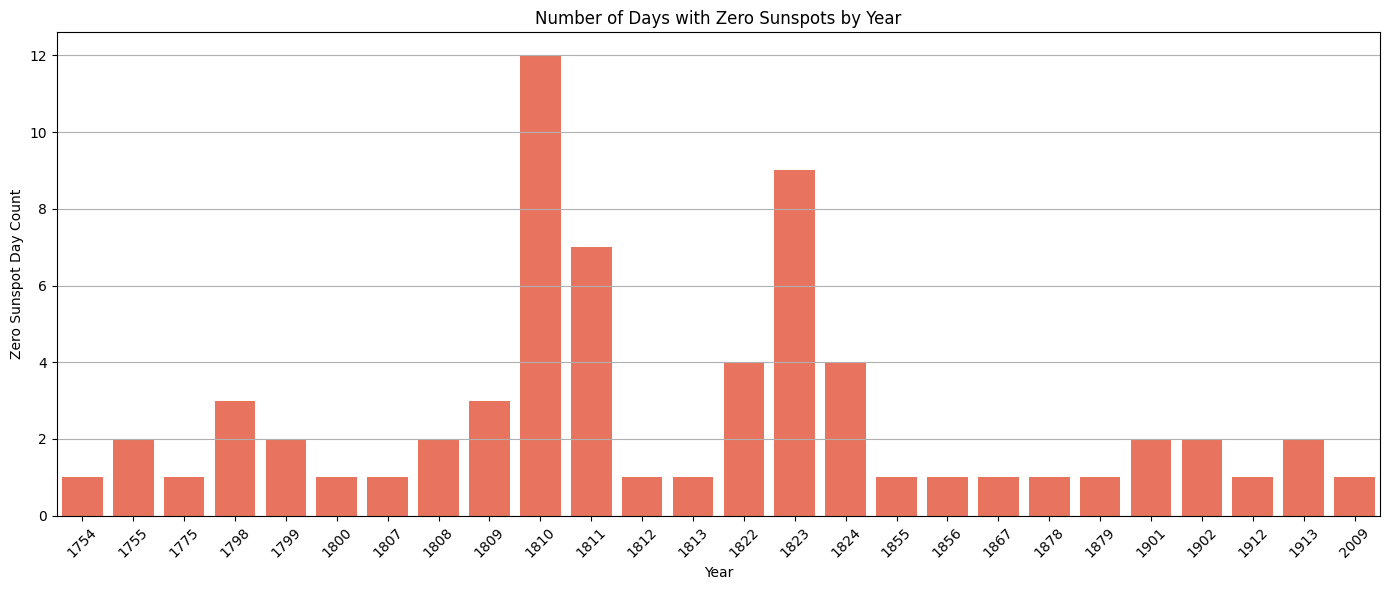

In [7]:
# Check for missing values
zero_count = (df['Monthly Mean Total Sunspot Number'] == 0).sum()


print(f"Number of zero sunspot values: {zero_count}")
zero_sunspots = df[df['Monthly Mean Total Sunspot Number'] == 0]


zero_sunspots = df[df['Monthly Mean Total Sunspot Number'] == 0]


zero_counts_by_year = zero_sunspots.groupby(zero_sunspots.index.year).size()


plt.figure(figsize=(14, 6))
sns.barplot(x=zero_counts_by_year.index, y=zero_counts_by_year.values, color='tomato')
plt.title("Number of Days with Zero Sunspots by Year")
plt.xlabel("Year")
plt.ylabel("Zero Sunspot Day Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
# Remove rows with zero sunspot values
df.drop(index=df[df["Monthly Mean Total Sunspot Number"] == 0].index,inplace=True)


##Exploratory Data Analysis

#Shows the monthly average sunspot for all years.

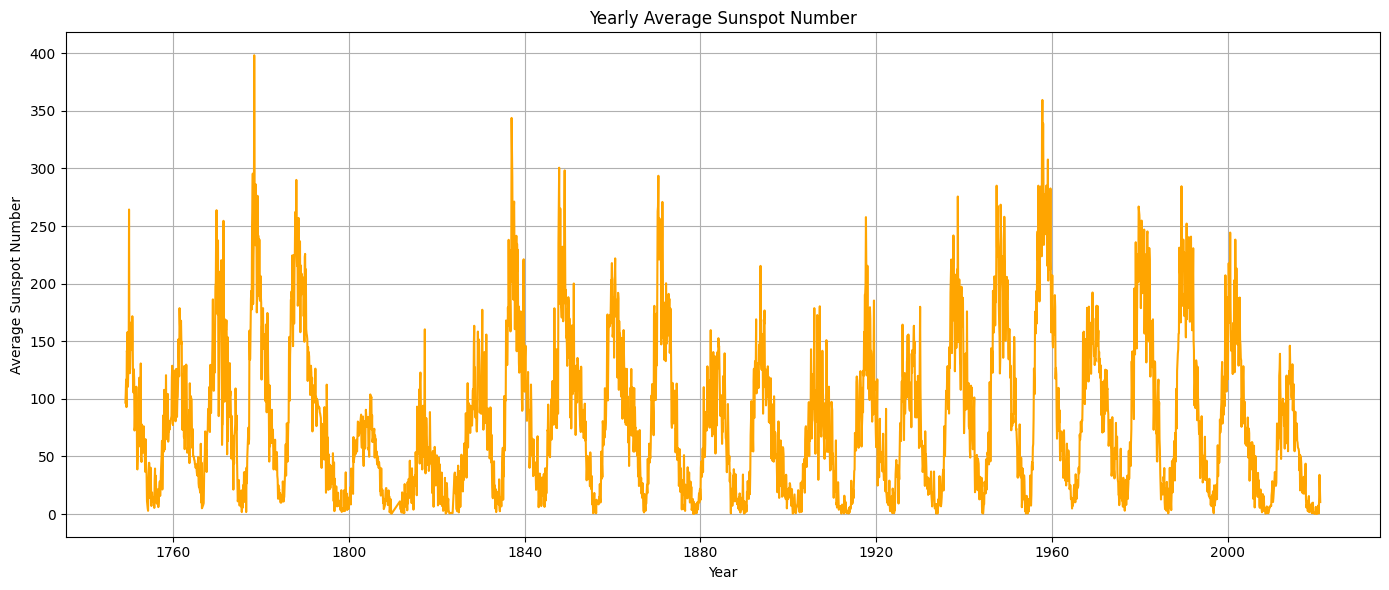

In [9]:
# Plot the distribution of the Monthly Mean Total Sunspot Number
yearly_avg = df.groupby("Date")["Monthly Mean Total Sunspot Number"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_avg, x="Date", y="Monthly Mean Total Sunspot Number", color="orange")
plt.title("Yearly Average Sunspot Number")
plt.xlabel("Year")
plt.ylabel("Average Sunspot Number")
plt.grid(True)
plt.tight_layout()
plt.show()

#shows the average sunspot averages for the months

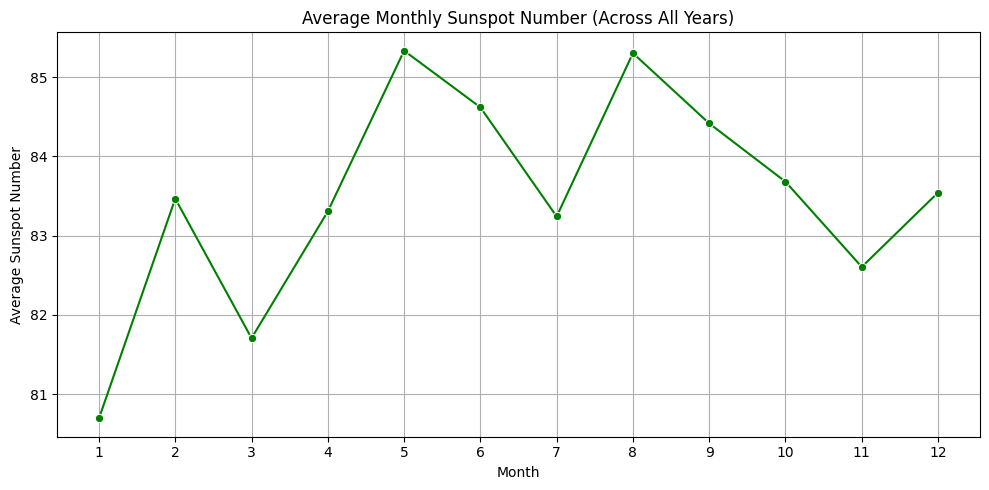

In [10]:
# Plot the distribution of the Monthly Mean Total Sunspot Number
monthly_avg = df.groupby(df.index.month)["Monthly Mean Total Sunspot Number"].mean().reset_index()
monthly_avg.rename(columns={'Date': 'Month', 'index': 'Month'}, inplace=True)  # ensure column is named 'Month'

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_avg, x="Month", y="Monthly Mean Total Sunspot Number", marker='o', color="green")
plt.title("Average Monthly Sunspot Number (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Sunspot Number")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

#graph of monthly sunspot averages for the last 100 years

C:\Users\Monster\AppData\Local\Temp\ipykernel_29176\2331167805.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_means, x="Month", y="Monthly Mean Total Sunspot Number", palette="viridis")


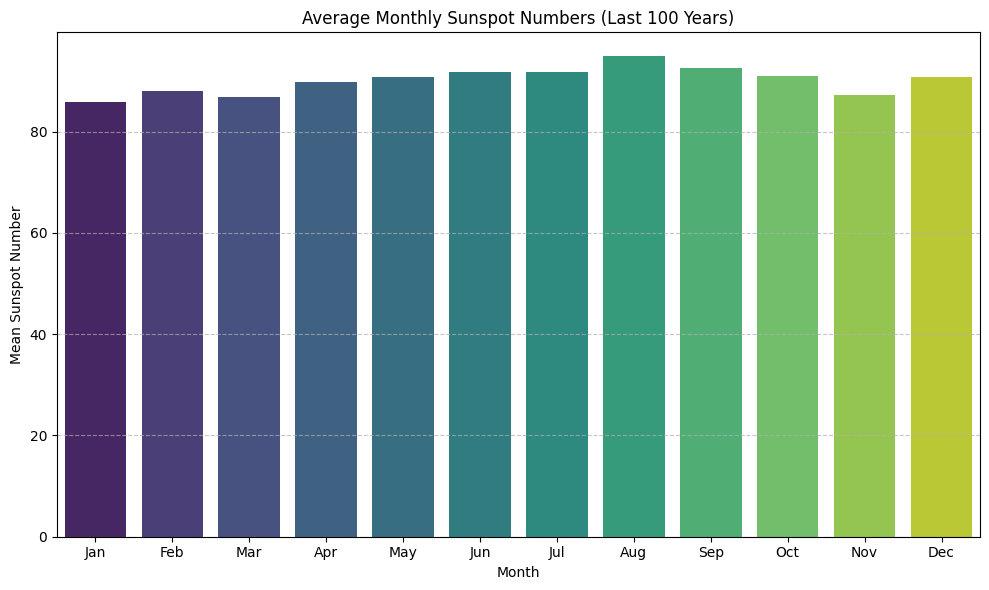

In [11]:

# Calculate the average monthly sunspot numbers for the last 100 years
last_100_years = df.index.year.max() - 100

df_recent = df[df.index.year >= last_100_years].copy()

df_recent['Month'] = df_recent.index.month

monthly_means = df_recent.groupby("Month")["Monthly Mean Total Sunspot Number"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_means, x="Month", y="Monthly Mean Total Sunspot Number", palette="viridis")

plt.title("Average Monthly Sunspot Numbers (Last 100 Years)")
plt.xlabel("Month")
plt.ylabel("Mean Sunspot Number")
plt.xticks(ticks=range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Heat graph of sunspots over the last 20 years

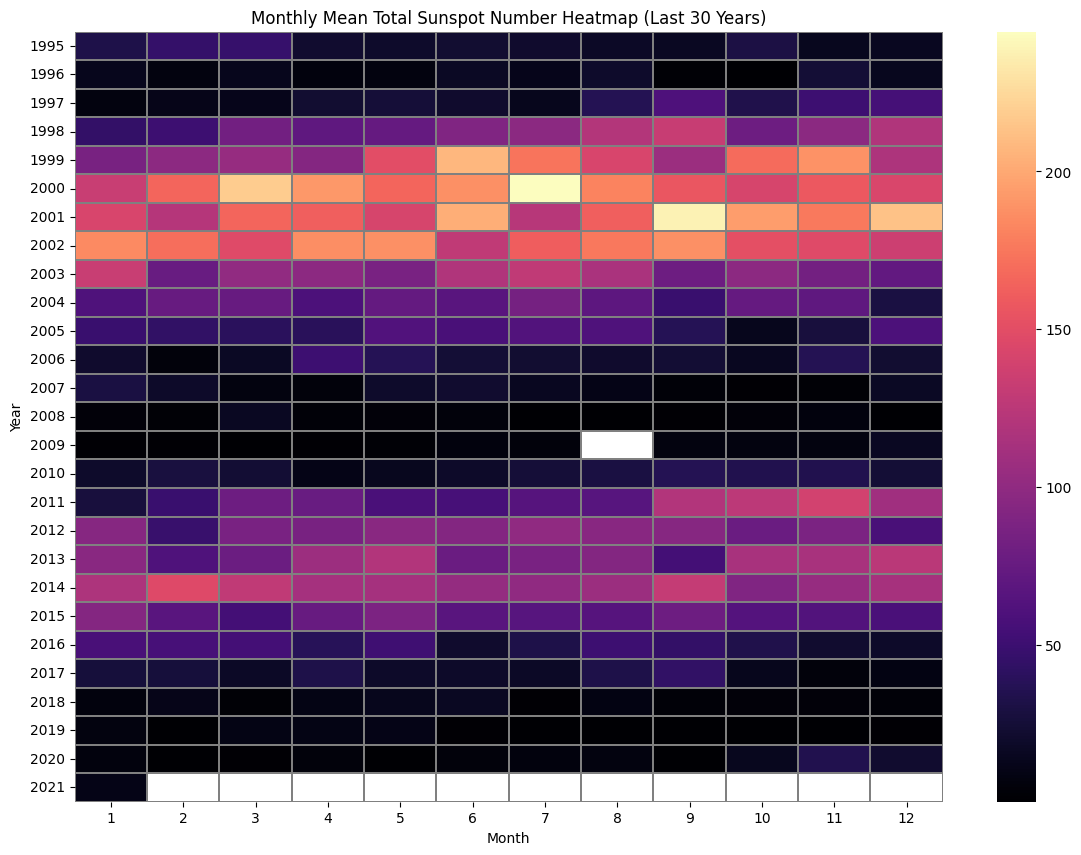

In [12]:
if 'Year' not in df.columns or 'Month' not in df.columns:
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    
current_year = datetime.now().year
last_30_years = current_year - 30
df1_recent = df[df['Year'] >= last_30_years]
heatmap_data = df1_recent.pivot_table(
    index="Year",
    columns="Month",
    values="Monthly Mean Total Sunspot Number",
    aggfunc="mean"
)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="magma", linewidths=0.1, linecolor='gray')
plt.title("Monthly Mean Total Sunspot Number Heatmap (Last 30 Years)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


#graph of sunspot averages for each month over the last 50 years

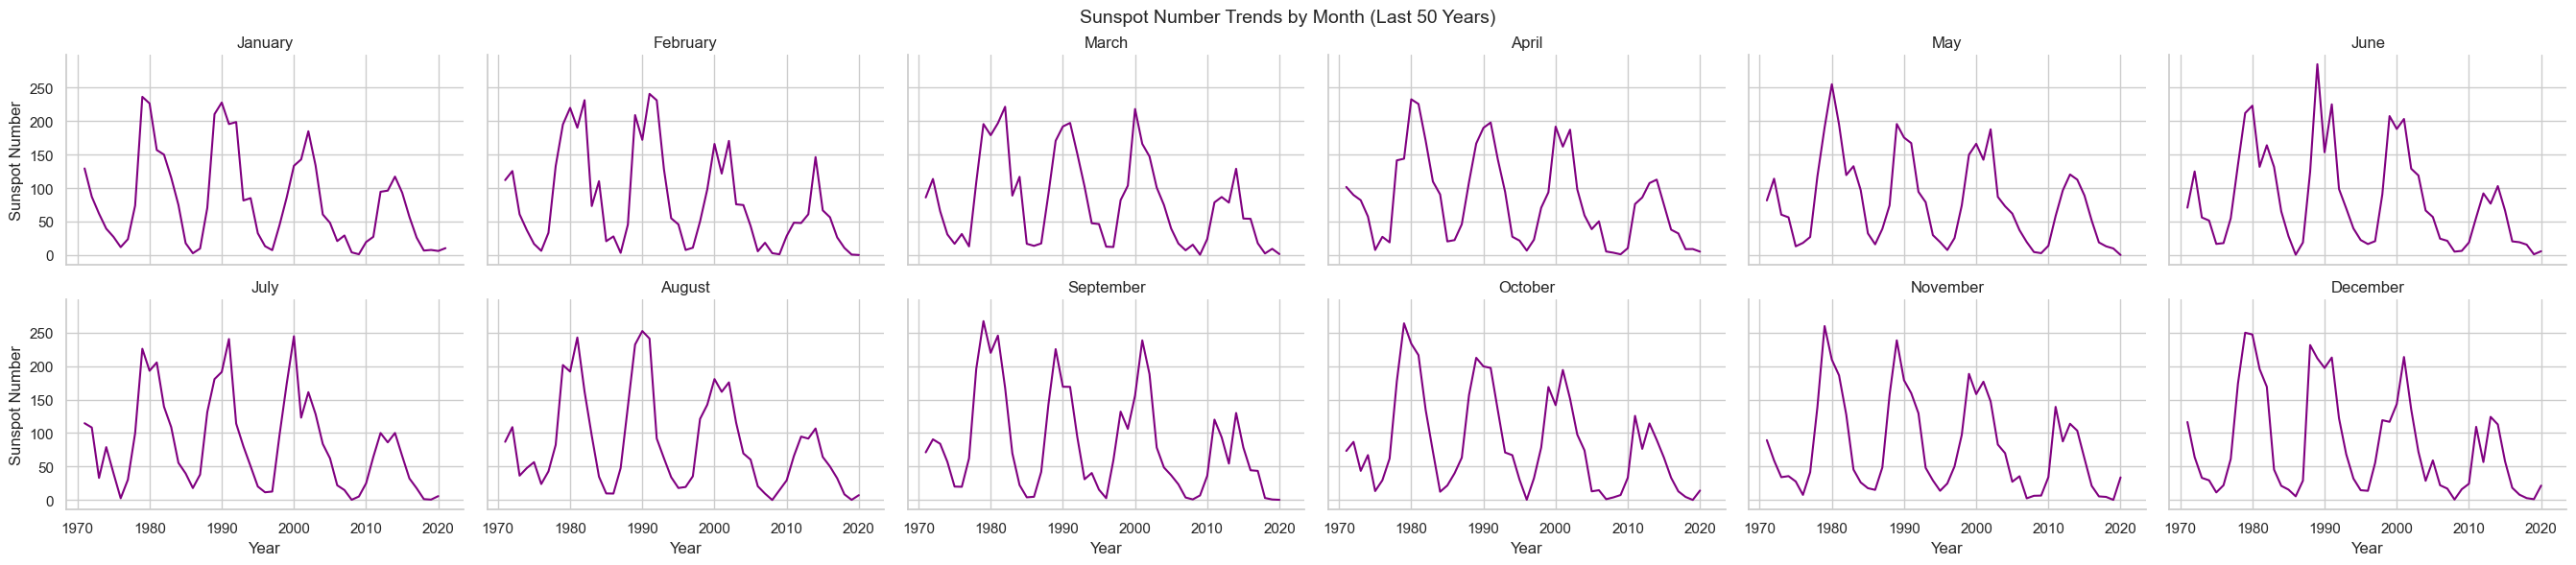

In [13]:
# Add a column for the month name
df['MonthName'] = df.index.strftime('%B')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['MonthName'] = pd.Categorical(df['MonthName'], categories=month_order, ordered=True)

df_last50 = df[df['Year'] >= (df['Year'].max() - 50)]

sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df_last50, col='MonthName', col_wrap=6, height=3, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Monthly Mean Total Sunspot Number', color='purple')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Sunspot Number")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Sunspot Number Trends by Month (Last 50 Years)", fontsize=14)
plt.show()

#Comparison graph of monthly average sunspot number between 1985-1996 and 1996-2007

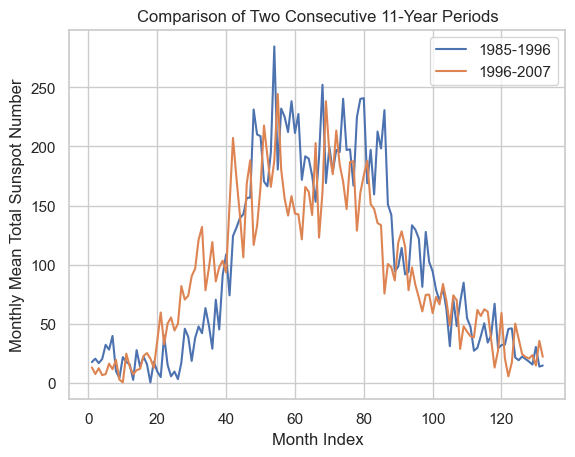

In [14]:
# Compare two consecutive 11-year periods
df_11_1985 = df[(df.index.year >= 1985) & (df.index.year < 1996)]
df_11_1996 = df[(df.index.year >= 1996) & (df.index.year < 2007)]

x_1985 = np.arange(1, len(df_11_1985) + 1)
x_1996 = np.arange(1, len(df_11_1996) + 1)

plt.plot(x_1985, df_11_1985['Monthly Mean Total Sunspot Number'], label='1985-1996')
plt.plot(x_1996, df_11_1996['Monthly Mean Total Sunspot Number'], label='1996-2007')
plt.legend()
plt.xlabel('Month Index')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of Two Consecutive 11-Year Periods')
plt.show()

#Shows  sunspot averages for all years

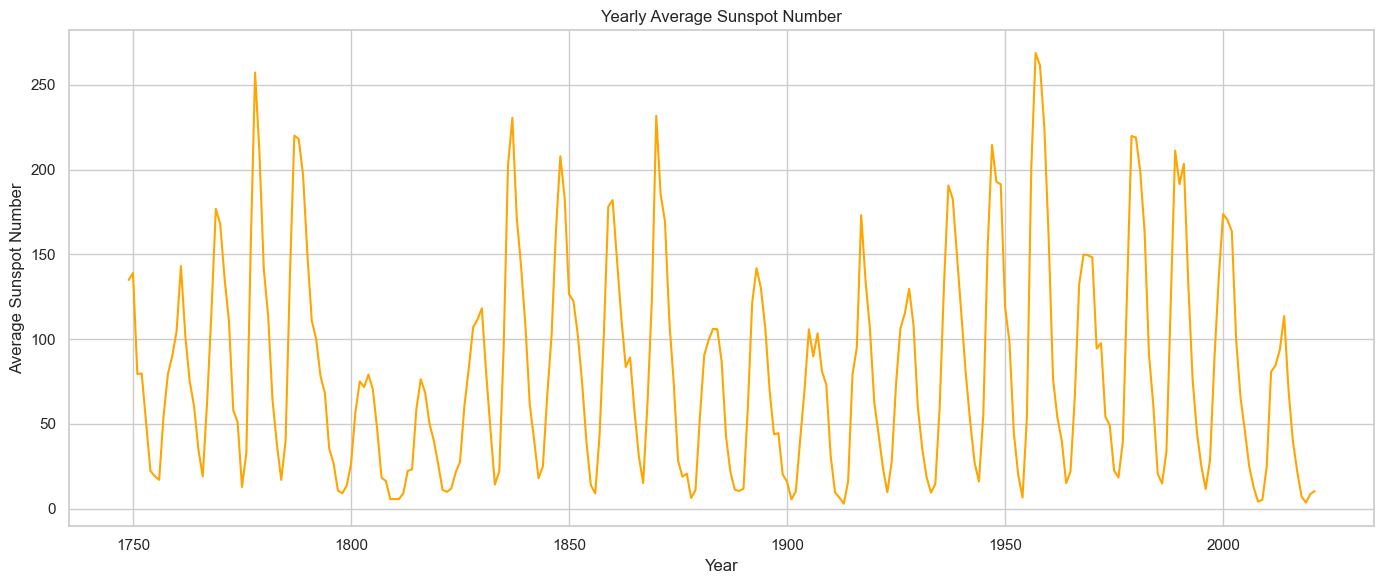

In [15]:
yearly_avg = df.groupby(df.index.year)["Monthly Mean Total Sunspot Number"].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly_avg, x="Date", y="Monthly Mean Total Sunspot Number", color="orange")
plt.title("Yearly Average Sunspot Number")
plt.xlabel("Year")
plt.ylabel("Average Sunspot Number")
plt.grid(True)
plt.tight_layout()
plt.show()


##statistical tests

#Shapiro-Wilk test for the last 20 years(Is the data normally distributed?)

Shapiro-Wilk Test Statistic p=: 0.9056
The data is NOT normally distributed  (p ≥ 0.05)


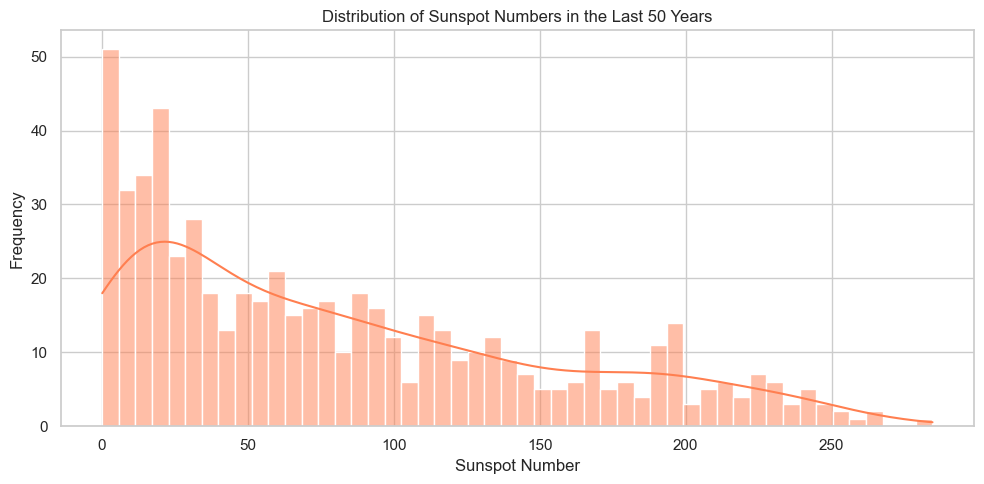

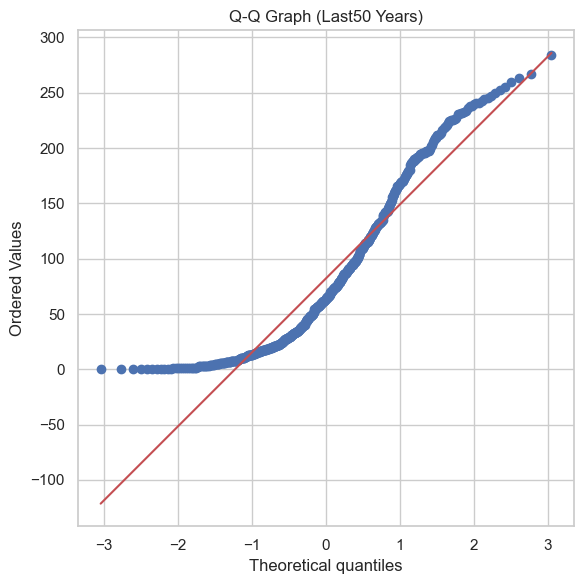

In [16]:

max_year = df.index.year.max()
df_last50 = df[df.index.year >= (max_year - 50)]
sunspot_last50 = df_last50['Monthly Mean Total Sunspot Number'].dropna()


if len(sunspot_last50) > 5000:
    sample = sunspot_last50.sample(5000, random_state=42)
else:
    sample = sunspot_last50


stat, p_value = shapiro(sample)
print("Shapiro-Wilk Test Statistic p=:", round(stat, 4))


if p_value < 0.05:
    print("The data is NOT normally distributed  (p ≥ 0.05)")
else:
    print("The data IS normally distributed  (p < 0.05)")



plt.figure(figsize=(10, 5))
sns.histplot(sample, bins=50, kde=True, color='coral')
plt.title("Distribution of Sunspot Numbers in the Last 50 Years")
plt.xlabel("Sunspot Number")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 6))
probplot(sample, dist="norm", plot=plt)
plt.title("Q-Q Graph (Last50 Years)")
plt.grid(True)
plt.tight_layout()
plt.show()


t-test for 2 different 11-year period groups(Compare sunspot means between two time periods: 1985–1996 vs 1996–2007)

In [17]:


group1 = df[(df.index.year >= 1985) & (df.index.year <= 1996)]['Monthly Mean Total Sunspot Number'].dropna()
group2 = df[(df.index.year >= 1996) & (df.index.year <= 2007)]['Monthly Mean Total Sunspot Number'].dropna()

stat, p = ttest_ind(group1, group2, equal_var=False)
print(f"T-Test p-value: {p:.4f}")
if p < 0.05:
    print("Conclusion: There is a significant difference between the two periods.")
else:
    print("Conclusion: No significant difference between the two periods.")

T-Test p-value: 0.4981
Conclusion: No significant difference between the two periods.


#Poisson Distribution Check (Is the distribution Poisson-like? )

In [18]:


filtered = df[df['Monthly Mean Total Sunspot Number'] < 100]['Monthly Mean Total Sunspot Number'].dropna().astype(int)
mean = filtered.mean()
var = filtered.var()

print(f"Poisson Mean: {mean:.2f}, Variance: {var:.2f}")
if np.isclose(mean, var, rtol=0.2):
    print("Conclusion: The data fits a Poisson distribution.")
else:
    print("Conclusion: The data does not fit a Poisson distribution.")

Poisson Mean: 42.31, Variance: 866.21
Conclusion: The data does not fit a Poisson distribution.


#Chi-Square test

In [19]:
        

#
df['SunspotCategory'] = pd.cut(df['Monthly Mean Total Sunspot Number'],
                               bins=[-1, 20, 70, df['Monthly Mean Total Sunspot Number'].max()],
                               labels=["Low", "Medium", "High"])


contingency_table = pd.crosstab(df.index.month, df['SunspotCategory'])


chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("Conclusion: Monthly means are significantly different from expected uniform distribution.")
else:
    print("Conclusion: Monthly means are not significantly different from the expected values.")




Chi-Square Statistic: 9.482481669219219
P-value: 0.9904211904785045
Conclusion: Monthly means are not significantly different from the expected values.


#Pearson Correlation test

In [20]:

df['Timestamp'] = df.index.astype(np.int64) // 10**9

corr, p_value = pearsonr(df['Timestamp'], df['Monthly Mean Total Sunspot Number'])

print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: No significant relationship between time and sunspot numbers.")
else:
    print("Conclusion: There is a significant linear relationship between time and sunspot numbers.")




Pearson Correlation Coefficient: 0.0179
P-value: 0.3118
Conclusion: There is a significant linear relationship between time and sunspot numbers.


#Anova(Monthly)

In [21]:


groups = [df[df["Month"] == month]["Monthly Mean Total Sunspot Number"].dropna() for month in range(1, 13)]

f_stat, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_value)


if p_value < 0.05:
    print("Result: There is a statistically significant difference in sunspot numbers between months (p < 0.05).")
else:
    print("Result: There is no statistically significant difference between months (p ≥ 0.05).")


F-statistic: 0.10922005395236574
P-value: 0.9998721360169273
Result: There is no statistically significant difference between months (p ≥ 0.05).
